In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/multi/0422

/content/drive/MyDrive/multi/0422


### Scikit-Learn 맛보기
Iris 분류 - 결정트리, SVM, Logistic Regression

### 1. 데이터 전처리

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(iris['target_names'])
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
feature_names = [name[:-5] for name in iris.feature_names]
df = pd.DataFrame(iris.data, columns=feature_names)
df['target'] = iris.target

display(df.head())
display(df.tail())

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


,sepal length,sepal width,petal length,petal width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [10]:
import numpy as np

# target의 유니크한 값들과 각 값들의 데이터 수 출력
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [11]:
df.groupby('target').describe()

sepal length                                             sepal width  \
              count   mean       std  min    25%  50%  75%  max       count   
target                                                                        
0              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8        50.0   
1              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0        50.0   
2              50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9        50.0   

               ... petal length      petal width                             \
         mean  ...          75%  max       count   mean       std  min  25%   
target         ...                                                            
0       3.428  ...        1.575  1.9        50.0  0.246  0.105386  0.1  0.2   
1       2.770  ...        4.600  5.1        50.0  1.326  0.197753  1.0  1.2   
2       2.974  ...        5.875  6.9        50.0  2.026  0.274650  1.4  1.8   

                       
        50%  75%  max  
target                 
0       0.2  0.3  0.6  
1       1.3  1.5  1.8  
2       2.0  2.3  2.5  

[3 rows x 32 columns]

In [12]:
df.groupby('target').agg(['mean', 'std'])

sepal length           sepal width           petal length            \
               mean       std        mean       std         mean       std   
target                                                                       
0             5.006  0.352490       3.428  0.379064        1.462  0.173664   
1             5.936  0.516171       2.770  0.313798        4.260  0.469911   
2             6.588  0.635880       2.974  0.322497        5.552  0.551895   

       petal width            
              mean       std  
target                        
0            0.246  0.105386  
1            1.326  0.197753  
2            2.026  0.274650

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

setosa = df[df.target==0].iloc[:,:-1]
versi = df[df.target==1].iloc[:,:-1]
virgin = df[df.target==2].iloc[:,:-1]

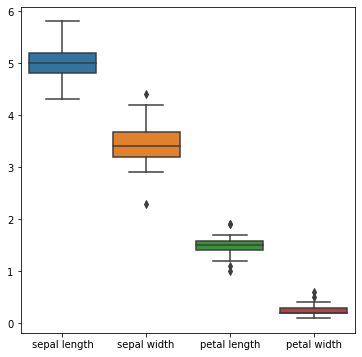

In [14]:
plt.figure(figsize=(6,6))

sns.boxplot(data=setosa)
#plt.boxplot(setosa.T) ??
plt.show()

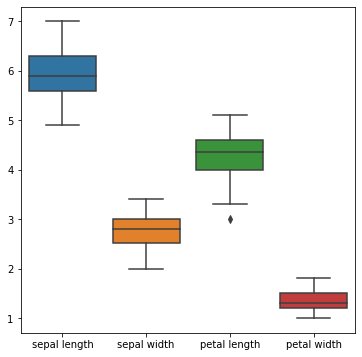

In [15]:
plt.figure(figsize=(6,6))

sns.boxplot(data=versi)
#plt.boxplot(setosa.T) ??
plt.show()

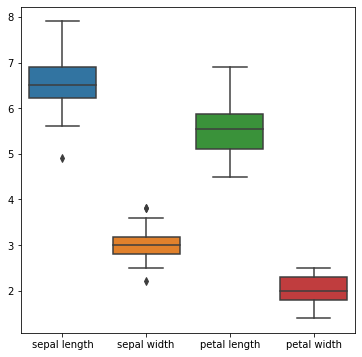

In [16]:
plt.figure(figsize=(6,6))

sns.boxplot(data=virgin)
#plt.boxplot(setosa.T) ??
plt.show()

### 2. 학습과 테스트 데이터로 분리

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=2021
)

# train_set : test_set = 3 : 1
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [18]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([34, 36, 42]))

In [19]:
# y값을 균등하게 뽑기 위해 stratify 옵션을 설정해야 한다.

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, random_state=2021
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [20]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([37, 37, 38]))

In [21]:
# test size 비율을 20%로 설정
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, test_size = 0.2, random_state=2021
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [22]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([40, 40, 40]))

### 3. 학습
- 결정 트리(Decision Tree)

In [23]:
from sklearn.tree import DecisionTreeClassifier

# 모델 생성 - 객체 생성

dtc = DecisionTreeClassifier(random_state=2022)

In [24]:
# 모델 하이퍼 파라미터
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [25]:
# 모델 학습
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [26]:
# 모델 예측
pred = dtc.predict(X_test)
pred

array([0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2,
       0, 2, 1, 0, 1, 1, 2, 0])

In [29]:
res = pd.DataFrame({'y': y_test, 'pred': pred, 'correct':y_test==pred})
res.head()

,y,pred,correct
0,0,0,True
1,1,1,True
2,1,2,False
3,2,2,True
4,0,0,True


### 평가

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.9

In [31]:
# 테스트와 평가를 한번에

dtc.score(X_test, y_test)

0.9

In [33]:
# 모델 생성 및 학습
from sklearn.svm import SVC

svm = SVC(random_state=2022)
svm.fit(X_train, y_train)

SVC(random_state=2022)

In [35]:
# 예측
pred_svm = svm.predict(X_test)
pred_svm

array([0, 1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 1, 2,
       0, 2, 1, 0, 1, 1, 2, 0])

In [36]:
accuracy_score(y_test, pred_svm)

0.9

- Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(max_iter=500, random_state=2022)
lrc.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=2022)

In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

iris_scaled = MinMaxScaler().fit_transform(iris.data)
print(iris_scaled[:5])

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    iris_scaled, iris.target, stratify=iris.target, test_size = 0.2, random_state=2021
)

lrc2 = LogisticRegression(random_state=2022)
lrc2.fit(X_train2, y_train2)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


LogisticRegression(random_state=2022)

In [49]:
# 예측 및 평가

pred_lr = lrc.predict(X_test)
print(accuracy_score(y_test, pred_lr))

pred_lr = lrc2.predict(X_test2)
print(accuracy_score(y_test2, pred_lr))

0.9333333333333333
0.9


### 3가지 모델 비교

In [52]:
print(dtc.score(X_test, y_test))
print(svm.score(X_test, y_test))
print(lrc.score(X_test, y_test))

0.9
0.9
0.9333333333333333


In [57]:
res['SV'] = pred_svm
res['LR'] = pred_lr
res.head()

,y,DT,SV,LR
0,0,0,0,0
1,1,1,1,1
2,1,2,1,2
3,2,2,2,2
4,0,0,0,0
